**Developers' Guide:** [Amazon Machine Learning](https://docs.aws.amazon.com/pdfs/machine-learning/latest/dg/machinelearning-dg.pdf#cross-validation)

# **Decision Tree**

[**Decision Tree**](https://scikit-learn.org/stable/modules/tree.html) A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.
<br>

**Popular Decision Tree Algorithms:**
[ID3](https://medium.com/@ashirbadpradhan8115/decision-tree-id3-algorithm-machine-learning-4120d8ba013b)
[C4.5 ](https://towardsdatascience.com/what-is-the-c4-5-algorithm-and-how-does-it-work-2b971a9e7db0)
[CART](https://www.geeksforgeeks.org/cart-classification-and-regression-tree-in-machine-learning/)
[CHAID](https://www.analyticsvidhya.com/blog/2021/05/implement-of-decision-tree-using-chaid/)

<br>

**Pros:**
- White Box Model (simple to understand and interpret), Trees can be visualized.
- In-built feature selection
- Require little data preprocessing and preparation
- Perform well with large datasets
<br>

**Cons:**
- Overfitting
- Unstable due to data variation
- Not guaranteed global optimal solution, greedy construction
- Unbalanced datasets can create problems

#### **Task:**   


### **Dataset available on:** [UCI Machine Learning Iris](https://archive.ics.uci.edu/dataset/53/iris) [kaggle](https://www.kaggle.com/datasets/uciml/iris)

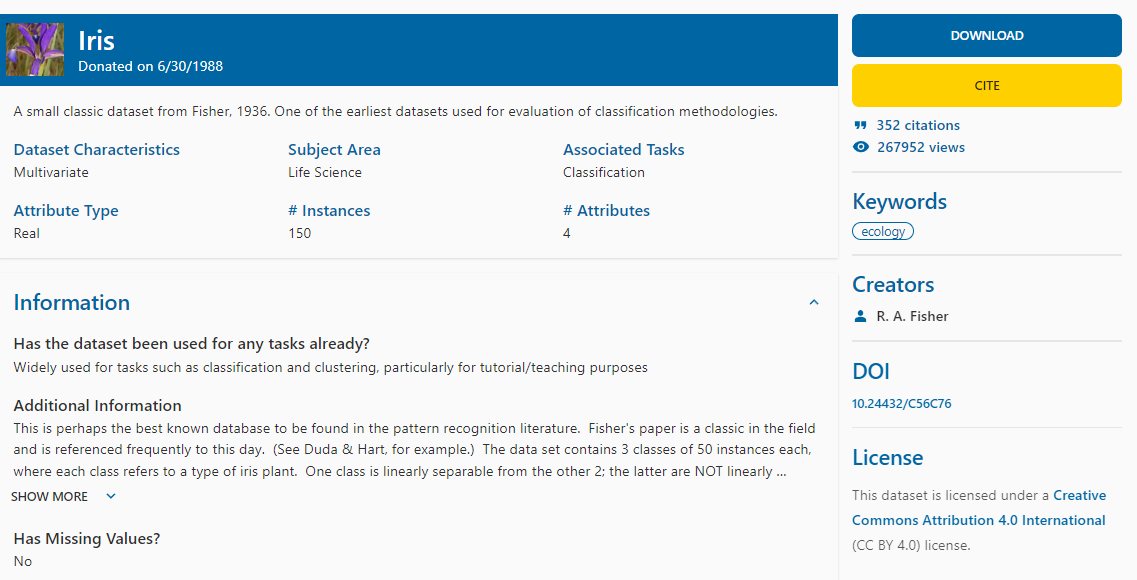

### **Imports**

In [ ]:
# import all the necessary library needed
import numpy as np # for scientific computing
import matplotlib.pyplot as plt # for visualisation purposes
import pandas as pd # for wrangling
# the dataset and the classifier algorithm
from sklearn.datasets import load_iris # in-built  data from the the sklearn library
from sklearn.tree import DecisionTreeClassifier, plot_tree # DecisionTree classifier and tree

### **The dataset**

Method 1:   in-built

In [ ]:
iris = load_iris() # contains the dataset and arrays one for the features other target
X, y = iris.data, iris.target # iris.data contain the features, while iris.target the target

In [ ]:
# print the first three variables
X[0:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [ ]:
# print the target y variable
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Method 2:  csv file

In [ ]:
# read the data using pandas
iris_dataset = pd.read_csv('/content/Iris.csv')

#### **Basic Exploratory data Analysis**

In [ ]:
# display the first five rows using the head function
iris_dataset.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# show the column names
iris_dataset.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
# shape of the data
iris_dataset.shape

(150, 6)

In [ ]:
# check for missing values
iris_dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
# check data types
iris_dataset.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [ ]:
# create a copy of the dataset for visualization purpose
default_df = iris_dataset.copy()
default_df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
# show the distribution of the data
iris_dataset['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

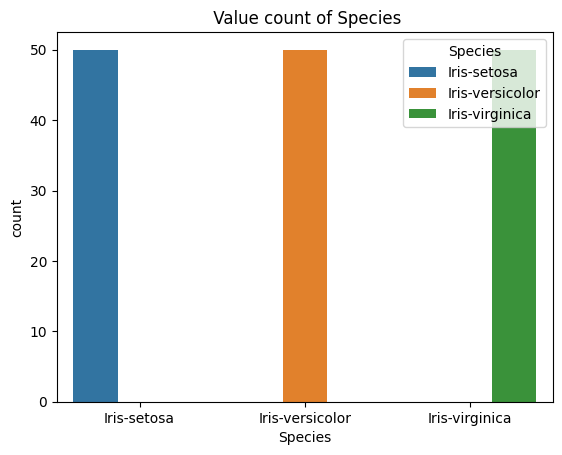

In [ ]:
# import seaborn as sns
import seaborn as sns
sns.countplot(data=default_df, x='Species', hue='Species').set(title = " Value count of Species");

### **Creating the decision tree:**

In [ ]:
# instantiate the classifier
decisionT_model = DecisionTreeClassifier()

**Note:** here I didn't split the data into training and test set since it's too small and we only have 150 observations but feel free to split it on your own.  for more on this check the svm notebook where I have created a split function to do the job easily.

In [ ]:
# traing the model by fitting the data
decisionT_model.fit(X,y)

DecisionTreeClassifier()

In [ ]:
# try to predict using the trained model
decisionT_model.predict([[6.1, 2.7, 3.9, 1.2]])

array([1])

### **Visualizing the tree:**

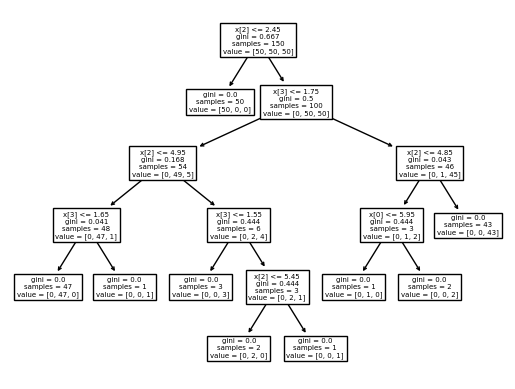

In [ ]:
# plot tree show the decision tree
plot_tree(decisionT_model);

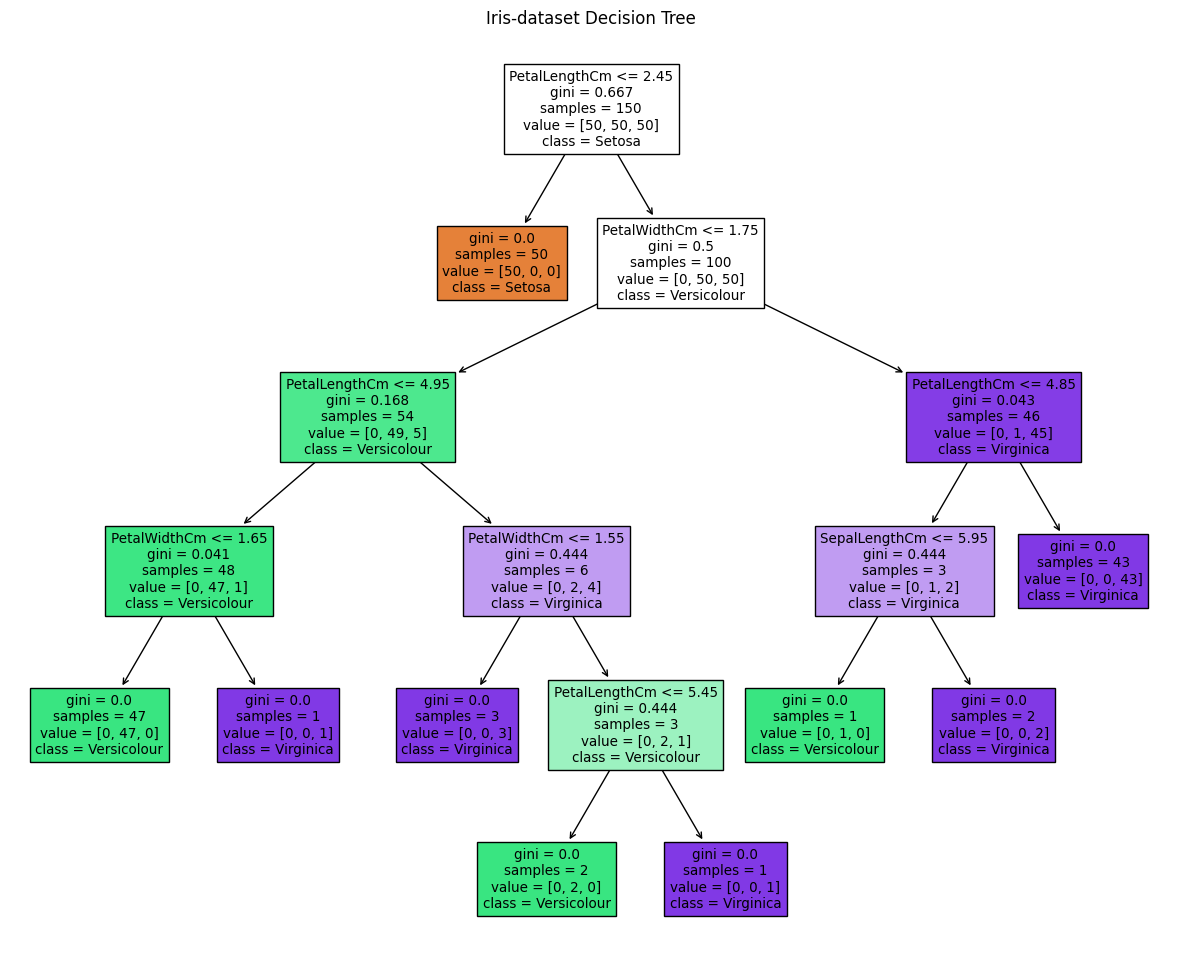

In [ ]:
# plot a smooth and clean tree using the matplotlib library
plt.figure(figsize=(15,12))
plot_tree(decisionT_model, filled = True,
          feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], # this grabs the column names from the datafram list(iris_dataset.columns)[1:5]
          class_names = ["Setosa", "Versicolour", "Virginica"])
plt.title("Iris-dataset Decision Tree")
plt.show()

#### **Decision tree metrics:**
[Gini Inpurity](https://www.section.io/engineering-education/entropy-information-gain-machine-learning/): used by CART algorithm is a measurement used to build Decision Trees to determine how the features of a dataset should split nodes to form the tree. More precisely, the Gini Impurity of a dataset is a number between 0-0.5, which indicates the likelihood of new, random data being misclassified if it were given a random class label according to the class distribution in the dataset.

[Information Gain](https://www.section.io/engineering-education/entropy-information-gain-machine-learning/): used by ID3, C4.5, C5.0 We can define information gain as a measure of how much information a feature provides about a class. Information gain helps to determine the order of attributes in the nodes of a decision tree.

### **Now over to you:**
- to read more about CART, ID3, C4.5, C5.0
- tune <a href="https://scikit-learn.org/stable/modules/tree.html">hyperparameter</a>
